### Bagging Method

***It is a homogeneous weak learners’ model that learns from each other independently in parallel and combines them for determining the model average. It decreases the variance and helps to avoid overfitting.***

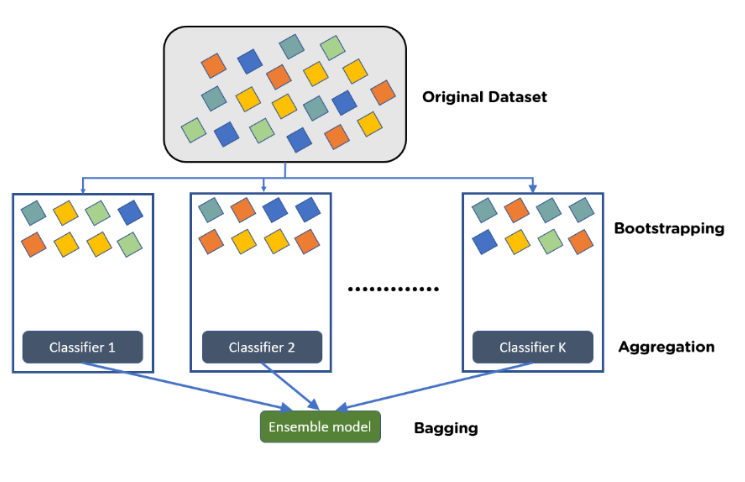

***Task is to check deaths information from the Titanic accident..***

# Data Details
***The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).***

### Read the dataset

In [5]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Pre-Modeling Tasks

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# Removing unnecesaary data
train_df.drop("PassengerId", inplace=True, axis=1)
test_df.drop("PassengerId", inplace=True, axis=1)

In [8]:
def string_to_numerical_features(df):
    df['Sex'].replace('male', 0, inplace=True)
    df['Sex'].replace('female', 1, inplace=True)

    df['Embarked'].replace('Q', 0, inplace=True)
    df['Embarked'].replace('S', 1, inplace=True)
    df['Embarked'].replace('C', 2, inplace=True)
    
string_to_numerical_features(train_df)
string_to_numerical_features(test_df)
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [9]:
# Also the cabin, ticket,name seems not to be useful so we remove
# these columns too

train_df.drop(["Cabin","Ticket","Name"],inplace=True, axis=1)
test_df.drop(["Cabin","Ticket","Name"],inplace=True, axis=1)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0


In [10]:
train_df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [11]:
train_df.drop(["Age","Embarked"],inplace=True, axis=1)
test_df.drop(["Age","Embarked"],inplace=True, axis=1)

In [12]:
train_df.isnull().any()

Survived    False
Pclass      False
Sex         False
SibSp       False
Parch       False
Fare        False
dtype: bool

In [13]:
# Target variable
# Pre-Modeling Tasks
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

### Spliting the dataset in training & test dataset

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.30)

### Create random forest model

In [15]:
from sklearn.ensemble import RandomForestClassifier
# Initiating the model:
rf = RandomForestClassifier(random_state=0)
rf.fit( X_train, y_train)

RandomForestClassifier(random_state=0)

### Predict the probabilities & class for test set

In [16]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
# Predict probabilities
probs_y = rf.predict_proba(X_test)
probs_y = np.round(probs_y, 2)

### Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[145  23]
 [ 25  75]]


All Precision values: [0.37313433 0.76530612 1.        ]
All Recall values: [1.   0.75 0.  ]


Text(0.5, 1.0, 'Precision Recall Graph')

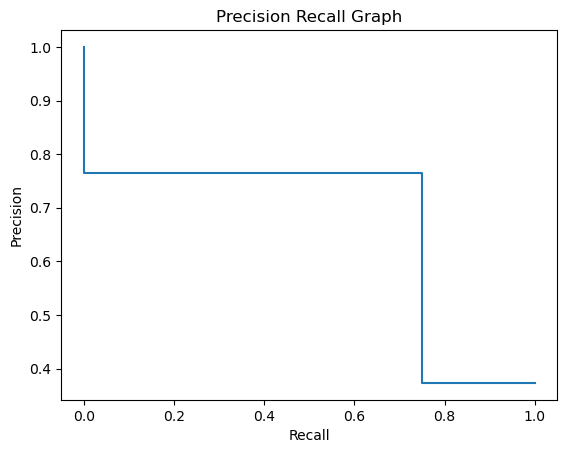

In [18]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, _ = precision_recall_curve(y_test, y_pred)
print('All Precision values:' ,precision)
print('All Recall values:' ,recall)

from sklearn.metrics import PrecisionRecallDisplay
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision Recall Graph')

In [19]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.8065476190476191

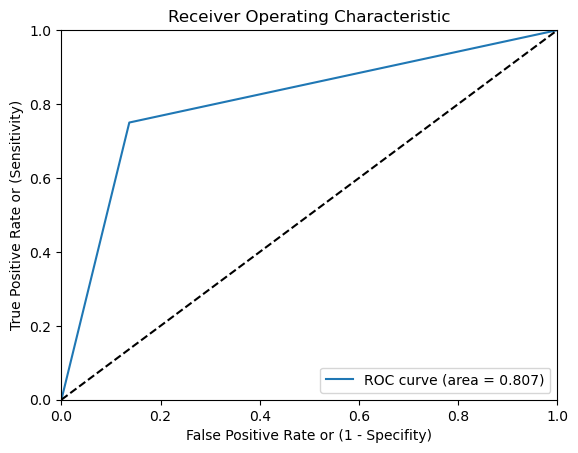

In [20]:
# Plot ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [21]:
print('Precision of test set: %.3f' % precision_score(y_test, y_pred))
print('Recall of test set: %.3f' % recall_score(y_test, y_pred))
print('Accuracy of test set: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score of test set: %.3f' % f1_score(y_test, y_pred))

Precision of test set: 0.765
Recall of test set: 0.750
Accuracy of test set: 0.821
F1 Score of test set: 0.758


### Predicitng on training datset using base model

In [22]:
# Predicting the Train set results
X_pred = rf.predict(X_train)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
cm = confusion_matrix(y_train, X_pred)
print(cm)

[[365  16]
 [ 32 210]]


In [23]:
print('Precision of training set: %.3f' % precision_score(y_train, X_pred))
print('Recall of training set: %.3f' % recall_score(y_train, X_pred))
print('Accuracy of training set: %.3f' % accuracy_score(y_train, X_pred))
print('F1 Score of training set: %.3f' % f1_score(y_train, X_pred))

Precision of training set: 0.929
Recall of training set: 0.868
Accuracy of training set: 0.923
F1 Score of training set: 0.897


### Performance metrics on both training & test datsets
| Dataset | Precision | Recall | Accuracy | F1 Score |
| --- | --- |  --- |   --- |   --- |
| Training | 0.929 | 0.868 | 0.923 | 0.897 |
| Test | 0.765 | 0.750 | 0.821 | 0.758 |

# Overfitting
$$ Training \   Accuracy >> Test \  Accuracy $$

# Underfitting
$$Training \ Accuracy << Test \ Accuracy$$

### Techniques to reduce overfitting:

* Increase training data.
* Reduce model complexity.
* Early stopping during the training phase (have an eye over the loss over the training period as soon as loss begins to increase stop training).
* Ridge Regularization and Lasso Regularization

### Techniques to reduce underfitting: 

* Increase model complexity
* Increase the number of features, performing feature engineering
* Remove noise from the data.

### Create random grid to tune the hyper-parameters for random forest

In [24]:
# Create the random grid
random_grid = {'n_estimators': [4, 8, 16, 32],                # Number of trees in random forest
               'max_features': ['auto', 'sqrt'],              # Number of features to consider at every split
               'max_depth': [4, 8, 12, 16],                   # Maximum number of levels in tree
               'min_samples_split': [4, 8, 16, 32],           # Minimum number of samples required to split a node
               'min_samples_leaf': [4, 8],                    # Minimum number of samples required at each leaf node
               'bootstrap': [True, False]}                    # Method of selecting samples for training each tree

### Find best parameters using cross-validation

In [25]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 4, verbose=1, random_state=0)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 8, 12, 16],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 8],
                                        'min_samples_split': [4, 8, 16, 32],
                                        'n_estimators': [4, 8, 16, 32]},
                   random_state=0, verbose=1)

In [26]:
rf_random.best_params_

{'n_estimators': 8,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

### Create Random Forest using the best parameters`

In [30]:
rf_best = RandomForestClassifier(n_estimators = 16, min_samples_split = 32, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 16, bootstrap=False,random_state=0) 
rf_best.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=False, max_depth=16, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=32,
                       n_estimators=16, random_state=0)

### Plot the first decision tree

[Text(0.525, 0.9642857142857143, 'Pclass <= 0.5\ngini = 0.475\nsamples = 623\nvalue = [381, 242]'),
 Text(0.23333333333333334, 0.8928571428571429, 'Survived <= 1.5\ngini = 0.315\nsamples = 408\nvalue = [328, 80]'),
 Text(0.06666666666666667, 0.8214285714285714, 'Parch <= 26.144\ngini = 0.463\nsamples = 88\nvalue = [56, 32]'),
 Text(0.03333333333333333, 0.75, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.1, 0.75, 'Sex <= 0.5\ngini = 0.476\nsamples = 82\nvalue = [50, 32]'),
 Text(0.06666666666666667, 0.6785714285714286, 'Parch <= 30.598\ngini = 0.448\nsamples = 59\nvalue = [39, 20]'),
 Text(0.03333333333333333, 0.6071428571428571, 'gini = 0.476\nsamples = 23\nvalue = [9, 14]'),
 Text(0.1, 0.6071428571428571, 'SibSp <= 1.5\ngini = 0.278\nsamples = 36\nvalue = [30, 6]'),
 Text(0.06666666666666667, 0.5357142857142857, 'SibSp <= 0.5\ngini = 0.219\nsamples = 32\nvalue = [28, 4]'),
 Text(0.03333333333333333, 0.4642857142857143, 'gini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(0.1, 0

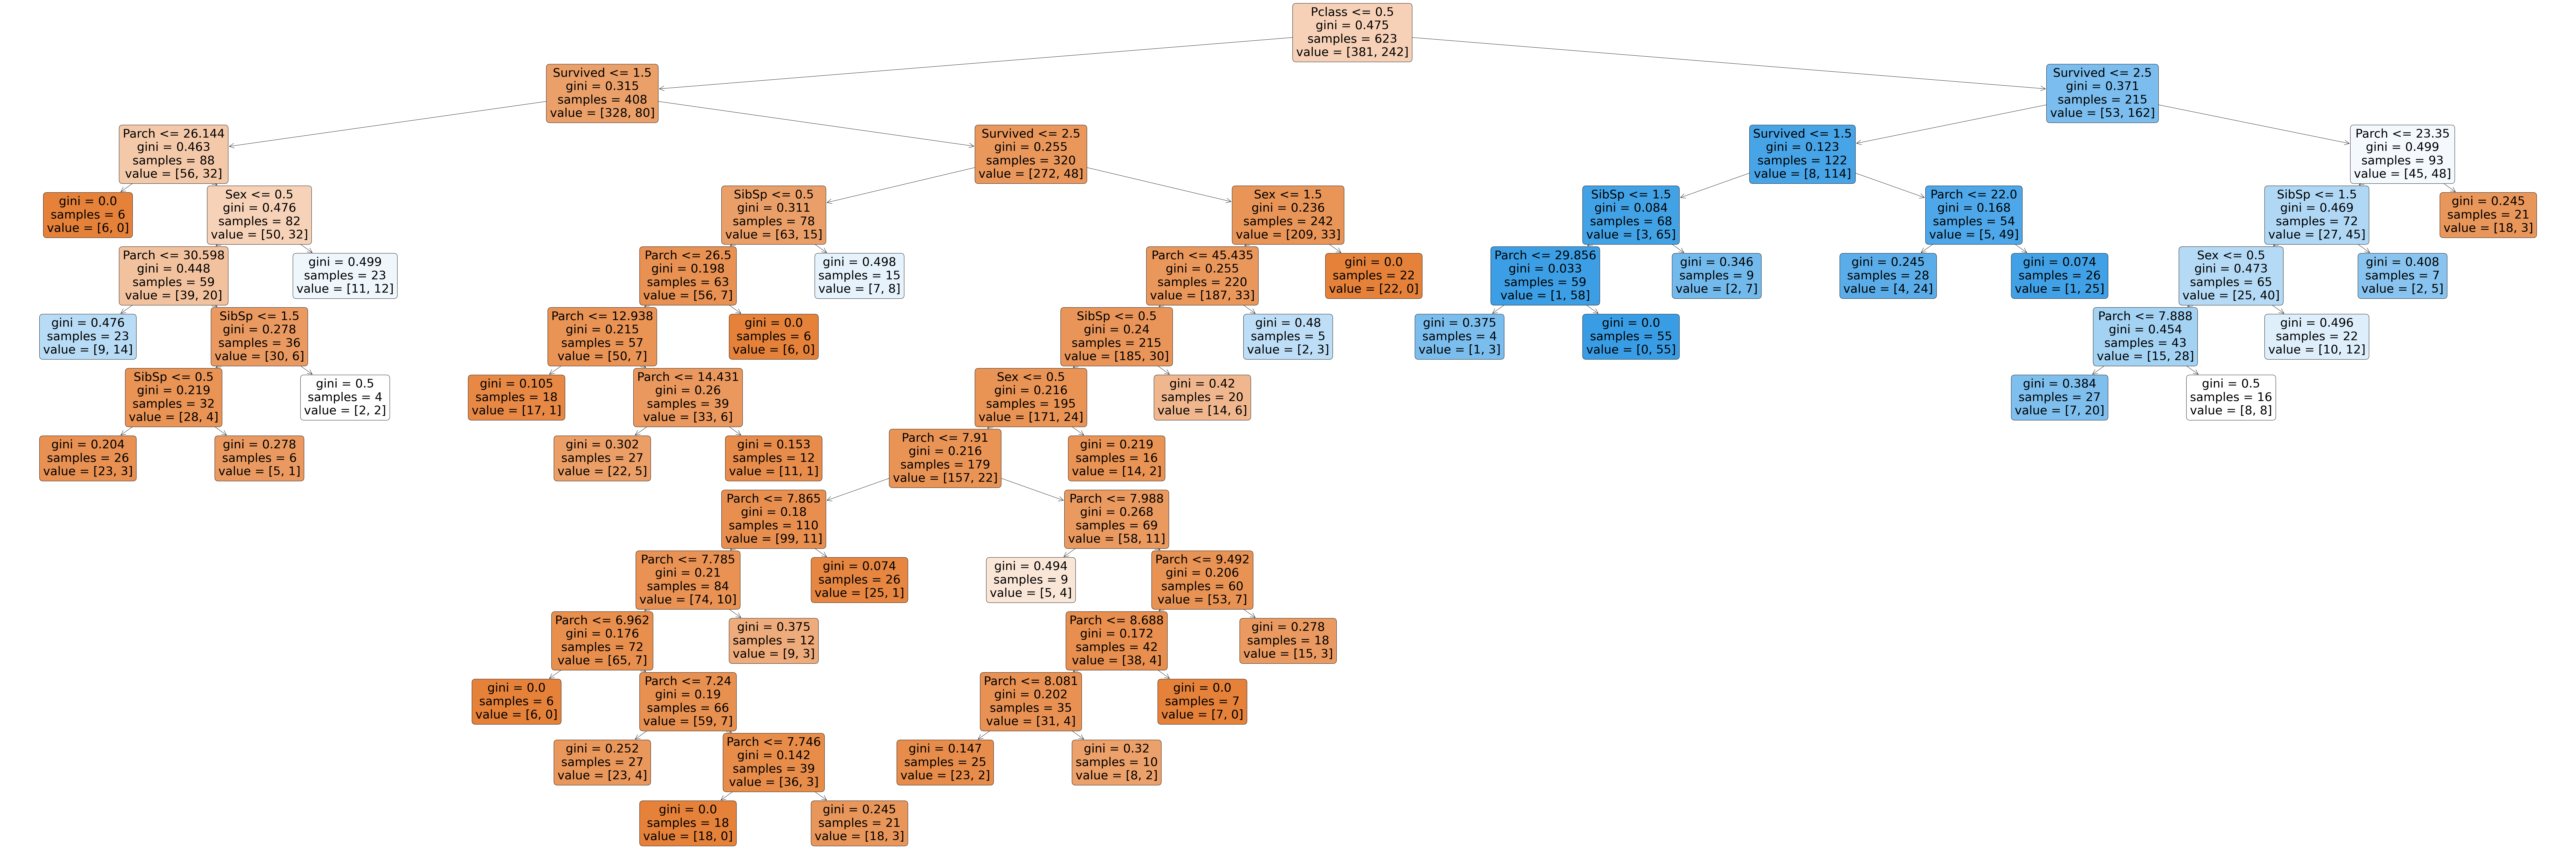

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(150, 50))
plot_tree(rf_best.estimators_[0], 
          feature_names=train_df.columns,
#           class_names=X_train, 
          filled=True, impurity=True, 
          rounded=True)
# plt.show()

In [35]:
# Predicting the Test set results
y_pred_best = rf_best.predict(X_test)
# Predict probabilities
probs_y_best = rf_best.predict_proba(X_test)
probs_y_best = np.round(probs_y_best, 2)

In [36]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
cm = confusion_matrix(y_test, y_pred_best) 
print(cm)

[[143  25]
 [ 29  71]]


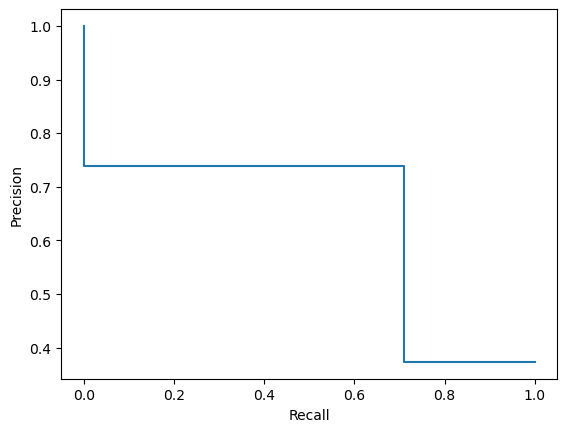

In [37]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_best)

from sklearn.metrics import PrecisionRecallDisplay
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [38]:
print('Precision: %.3f' % precision_score(y_test, y_pred_best))
print('Recall: %.3f' % recall_score(y_test, y_pred_best))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_best))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_best))

Precision: 0.740
Recall: 0.710
Accuracy: 0.799
F1 Score: 0.724


In [39]:
from sklearn.metrics import roc_curve, auc
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_best)
roc_auc_best = auc(fpr_best, tpr_best)
roc_auc_best

0.780595238095238

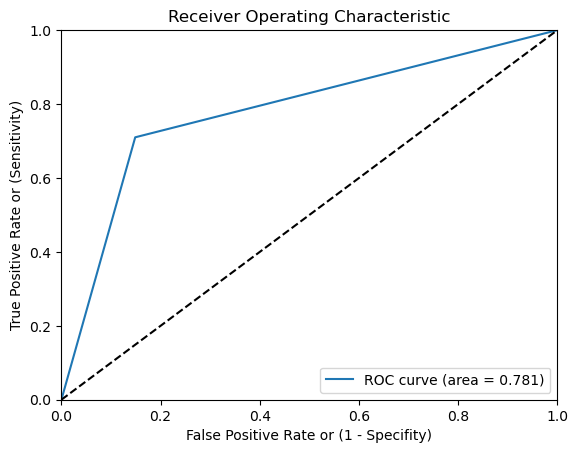

In [40]:
# Plot ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr_best, tpr_best, label='ROC curve (area = %0.3f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

### Predicting on training dataset using new model

In [41]:
# Predicting the Train set results
X_pred_best = rf_best.predict(X_train)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
cm = confusion_matrix(y_train, X_pred_best)
print(cm)

print('Precision: %.3f' % precision_score(y_train, X_pred_best))
print('Recall: %.3f' % recall_score(y_train, X_pred_best))

[[344  37]
 [ 71 171]]
Precision: 0.822
Recall: 0.707


### Performance metrics on both training & test datsets
| Dataset | Precision | Recall |
| --- | --- |  --- |   
| Training | 0.822 | 0.707 | 
| Test | 0.740 | 0.710 | 